<a href="https://colab.research.google.com/github/Leelddd/alchemy-101/blob/master/dlwp/5_2_training_a_convnet_from_scratch_on_a_small_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.2 Training a convnet from scratch on a small dataset

download the data follow [this guide](https://medium.com/@opalkabert/downloading-kaggle-datasets-into-google-colab-fb9654c94235)

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:
# upload kaggle.json
from google.colab import files
files.upload()

In [0]:
!mv kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [33]:
!kaggle competitions download -c dogs-vs-cats -p dogcat

sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
test1.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [35]:
ls dogcat

base/  sampleSubmission.csv  test1.zip  train/  train.zip


In [0]:
!unzip dogcat/train.zip -d dogcat/

In [19]:
!ls dogcat/base/test/cats | head -n 10

ls: cannot access 'dogcat/base/test/cats': No such file or directory


In [0]:
mv test1 train dogcat

In [3]:
rm -r dogcat/base

rm: cannot remove 'dogcat/base': No such file or directory


In [0]:
import os, shutil

original_dataset_dir = 'dogcat/train'
base_dir = 'dogcat/base'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

In [0]:
def mkdir(base, name):
    new_dir = os.path.join(base, name)
    if not os.path.exists(new_dir):
        os.mkdir(new_dir)
    return new_dir

train_dir = mkdir(base_dir, 'train')
validation_dir = mkdir(base_dir, 'validation')
test_dir = mkdir(base_dir, 'test')

train_cats_dir = mkdir(train_dir, 'cats')
train_dogs_dir = mkdir(train_dir, 'dogs')
validation_cats_dir = mkdir(validation_dir, 'cats')
validation_dogs_dir = mkdir(validation_dir, 'dogs')
test_cats_dir = mkdir(test_dir, 'cats')
test_dogs_dir = mkdir(test_dir, 'dogs')

def copy(name, r, original, to):
    fnames = ['{}.{}.jpg'.format(name, i) for i in r]
    for fname in fnames:
        src = os.path.join(original, fname)
        dst = os.path.join(to, fname)
        shutil.copyfile(src, dst)
        
copy('cat', range(1000), original_dataset_dir, train_cats_dir)
copy('cat', range(1000, 1500), original_dataset_dir, validation_cats_dir)
copy('cat', range(1500, 2000), original_dataset_dir, test_cats_dir)

copy('dog', range(1000), original_dataset_dir, train_dogs_dir)
copy('dog', range(1000, 1500), original_dataset_dir, validation_dogs_dir)
copy('dog', range(1500, 2000), original_dataset_dir, test_dogs_dir)    

In [38]:
dir_lst = [train_cats_dir, train_dogs_dir, validation_cats_dir, validation_dogs_dir, test_cats_dir, test_dogs_dir]
for dir in dir_lst:
    print(len(os.listdir(dir)))

1000
1000
500
500
500
500


In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

## 5.2.4 Data preprocessing

In [42]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [43]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [44]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 9s 86ms/step - loss: 0.6881 - acc: 0.5310 - val_loss: 0.6744 - val_acc: 0.6230
Epoch 2/30
100/100 [==============================] - 8s 79ms/step - loss: 0.6635 - acc: 0.6085 - val_loss: 0.6407 - val_acc: 0.6370
Epoch 3/30
100/100 [==============================] - 8s 80ms/step - loss: 0.6140 - acc: 0.6650 - val_loss: 0.6228 - val_acc: 0.6360
Epoch 4/30
100/100 [==============================] - 9s 94ms/step - loss: 0.5721 - acc: 0.6925 - val_loss: 0.5861 - val_acc: 0.6850
Epoch 5/30
100/100 [==============================] - 8s 82ms/step - loss: 0.5377 - acc: 0.7130 - val_loss: 0.5787 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 9s 88ms/step - loss: 0.5134 - acc: 0.7385 - val_loss: 0.5892 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 9s 87ms/step - loss: 0.4899 - acc: 0.7635 - val_loss: 0.5739 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 8s 80ms/step - 

In [0]:
if not os.path.exists('dogcat/model'):
    os.mkdir('dogcat/model')
model.save('dogcat/model/small_1.h5')

AttributeError: ignored

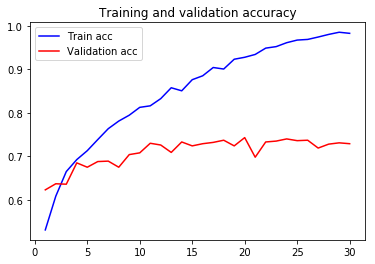

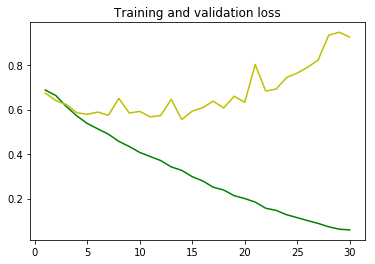

In [48]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Train acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'g', label='Train loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.legned()
plt.show()

## 5.2.5 Using data augmentation

In [0]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

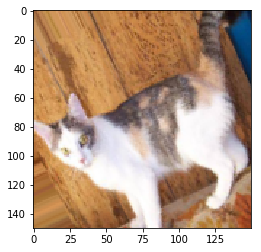

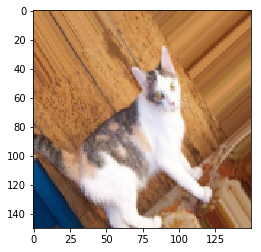

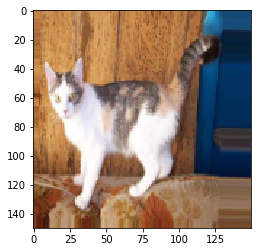

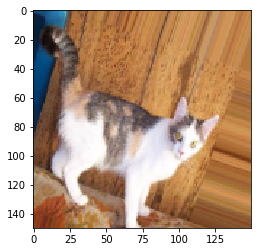

In [55]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
        
plt.show()

In [56]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [58]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 27s 270ms/step - loss: 0.6902 - acc: 0.5291 - val_loss: 0.6780 - val_acc: 0.5501
Epoch 2/100
100/100 [==============================] - 24s 236ms/step - loss: 0.6732 - acc: 0.5722 - val_loss: 0.6526 - val_acc: 0.6018
Epoch 3/100
100/100 [==============================] - 25s 252ms/step - loss: 0.6650 - acc: 0.5909 - val_loss: 0.6381 - val_acc: 0.6491
Epoch 4/100
100/100 [==============================] - 25s 253ms/step - loss: 0.6394 - acc: 0.6209 - val_loss: 0.6155 - val_acc: 0.6398
Epoch 5/100
100/100 [==============================] - 24s 237ms/step - loss: 0.6344 - acc: 0.6363 - val_loss: 0.6033 - val_acc: 0.6599
Epoch 6/100
100/100 [==============================] - 25s 246ms/step - loss: 0.6102 - acc: 0.6613 - val_loss: 0.5922 - val_acc: 0.6772
Epoch 7/100
100/100 [==============================] - 24s 242ms/step - loss: 0.6021 - acc: 0.6828 -

In [0]:
model.save('dogcat/model/small_2.h5')

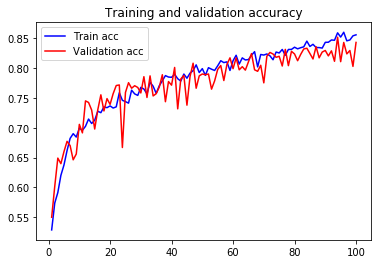

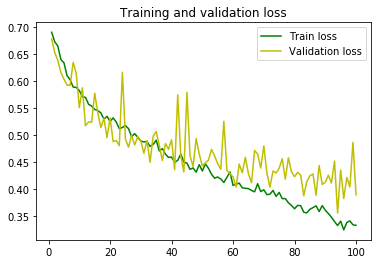

In [61]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Train acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'g', label='Train loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()